In [1]:
import warnings
import itertools
import pyodbc
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
import pandas as pd
import statsmodels.api as sm
import matplotlib

In [2]:
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [3]:
server = 'DESKTOP-K2IRLC1' 
database = 'DW2023' 
username = 'sa' 
password = '123456'  

driver = 'DRIVER={SQL Server};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password+ ';Trusted_Connection=yes'
# create the connection

query = '''SELECT DW.Dimension_Tiempo.FECHA AS FECHA, SUM([CANTIDAD_LLAMADAS]) AS [CANTIDAD]
  FROM DW.Hechos_Atencion INNER JOIN DW.Dimension_Tiempo
  ON DW.Hechos_Atencion.FECHAKEY = DW.Dimension_Tiempo.FECHAKEY

  GROUP BY DW.Dimension_Tiempo.FECHA
  ORDER BY DW.Dimension_Tiempo.FECHA'''

conn = pyodbc.connect(driver)
data = pd.read_sql(query,conn)

data.head()


,FECHA,CANTIDAD
0,2018-01-01,683.0
1,2018-01-02,431.0
2,2018-01-03,415.0
3,2018-01-04,514.0
4,2018-01-05,533.0


In [4]:
data.tail()

,FECHA,CANTIDAD
2186,2023-12-27,346.0
2187,2023-12-28,325.0
2188,2023-12-29,347.0
2189,2023-12-30,374.0
2190,2023-12-31,391.0


In [6]:
data['FECHA'].min()

Timestamp('2018-01-01 00:00:00')

In [7]:
data['FECHA'].max()

Timestamp('2023-12-31 00:00:00')

In [8]:
data = data.set_index('FECHA')
data.index

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09', '2018-01-10',
               ...
               '2023-12-22', '2023-12-23', '2023-12-24', '2023-12-25',
               '2023-12-26', '2023-12-27', '2023-12-28', '2023-12-29',
               '2023-12-30', '2023-12-31'],
              dtype='datetime64[ns]', name='FECHA', length=2191, freq=None)

In [9]:
grafic = data['CANTIDAD'].resample('MS').mean()

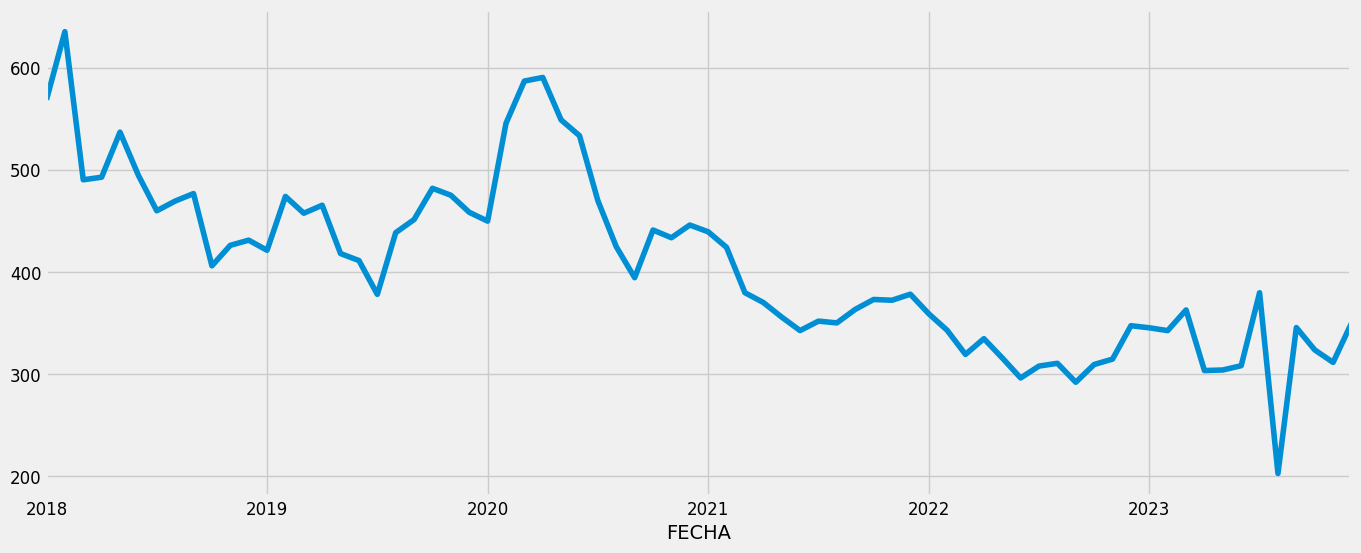

In [10]:
grafic.plot(figsize=(15, 6))
plt.show()

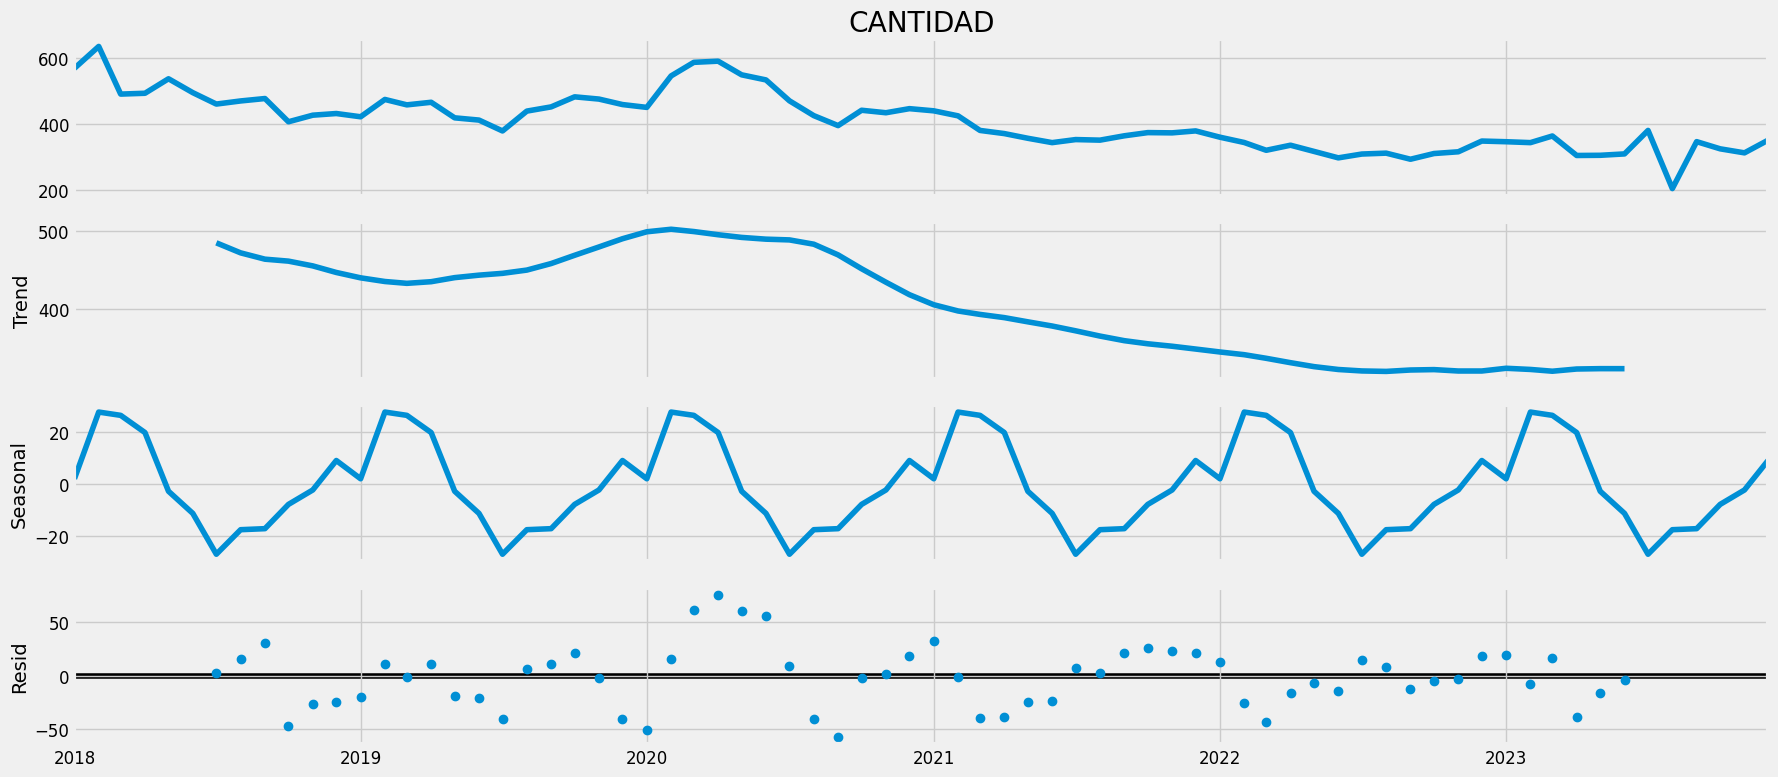

In [12]:
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(grafic, model='additive')
fig = decomposition.plot()
plt.show()

In [14]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [15]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(grafic,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1058.918071950621
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:825.8992354707809
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:693.7737026766235
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:554.6718644567478
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:694.4589783214504
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:658.5841017852601
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:564.6737697627245
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:546.8427391456785
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:961.619302160696
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:753.2945547288948
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:649.437928640281
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:519.4397257877324
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:666.4962028097121
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:630.1677908212775
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:540.389644602884
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:519.9822634747281
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:730.4725658344398
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:601.4217178678791
ARIMA(0, 1, 0

In [16]:
mod = sm.tsa.statespace.SARIMAX(grafic,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2421      0.522     -0.464      0.643      -1.265       0.781
ma.L1         -0.1397      0.534     -0.261      0.794      -1.187       0.907
ar.S.L12      -0.3820      0.260     -1.470      0.142      -0.891       0.127
ma.S.L12      -0.3450      0.325     -1.061      0.288      -0.982       0.292
sigma2      1906.9732    351.288      5.429      0.000    1218.462    2595.484


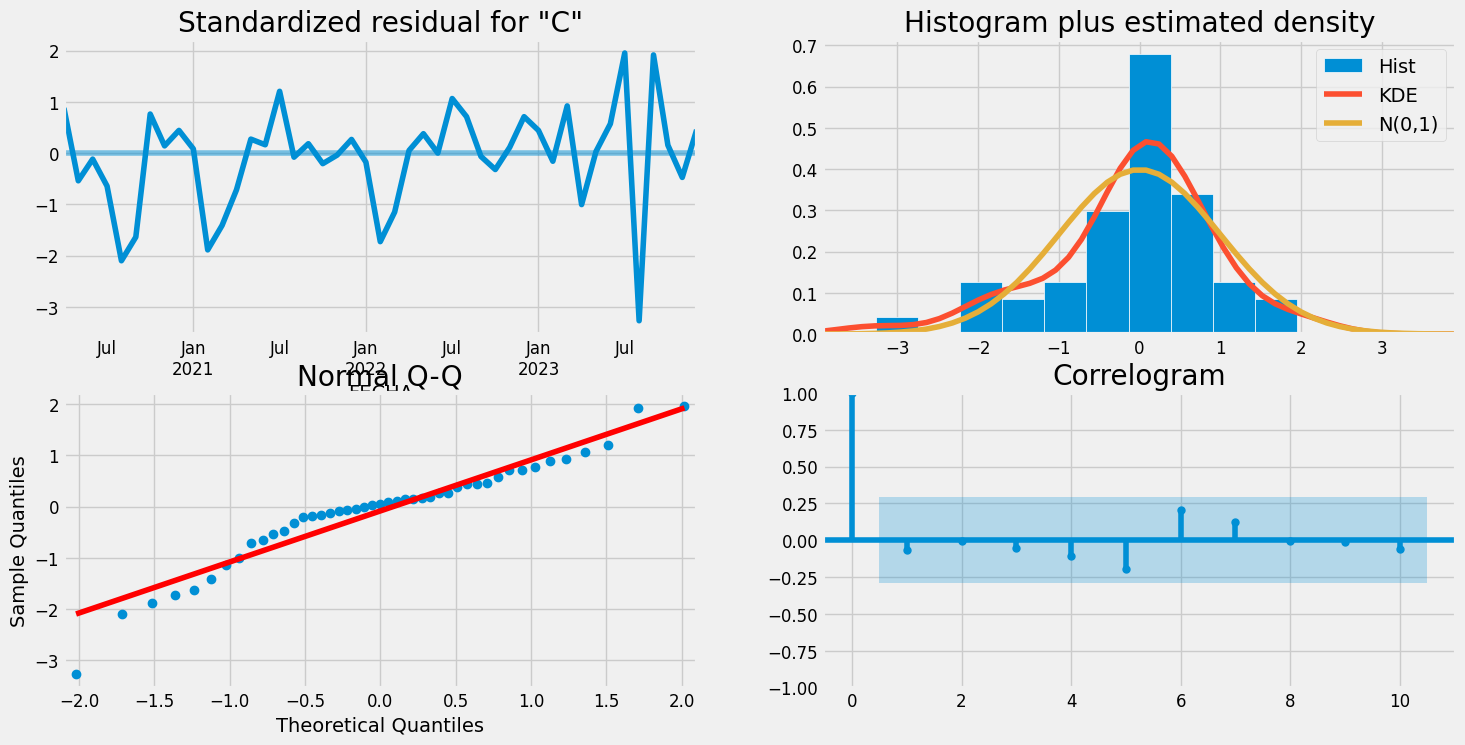

In [17]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

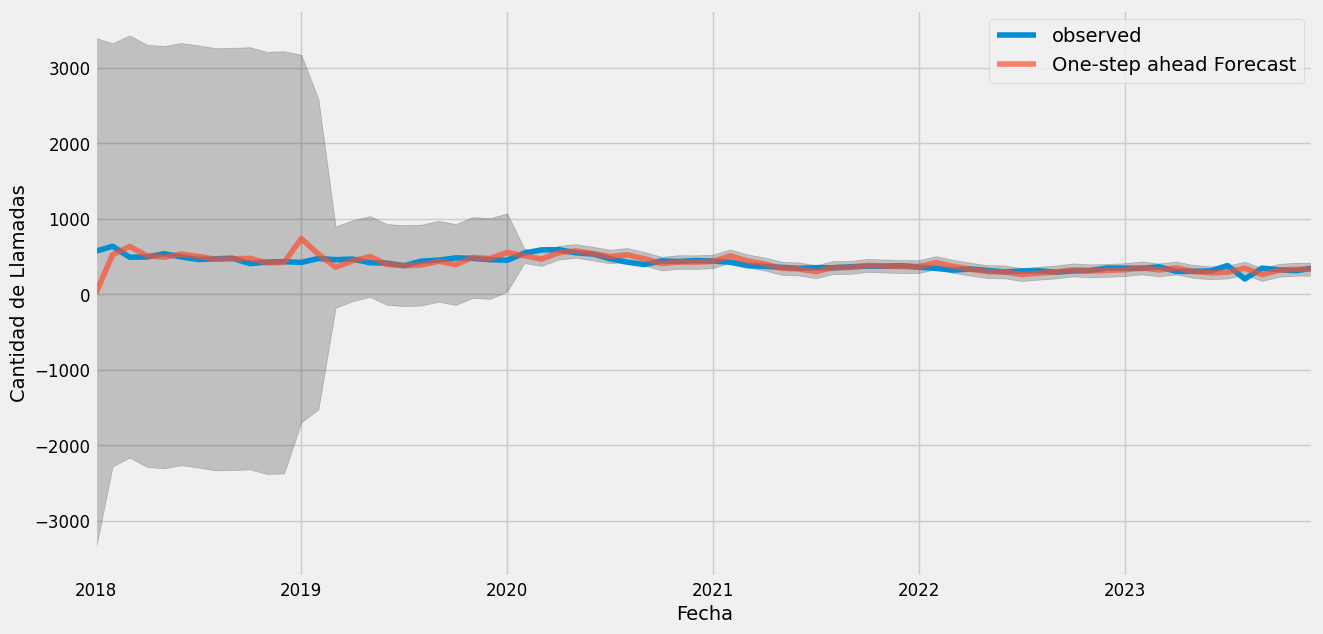

In [18]:
pred = results.get_prediction(start=pd.to_datetime('2018-01-01'), dynamic=False)
pred_ci = pred.conf_int()

ax = grafic['2018':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Fecha')
ax.set_ylabel('Cantidad de Llamadas')
plt.legend()

plt.show()

In [19]:
y_forecasted = pred.predicted_mean
y_truth = grafic['2021-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 1895.37


In [20]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 43.54


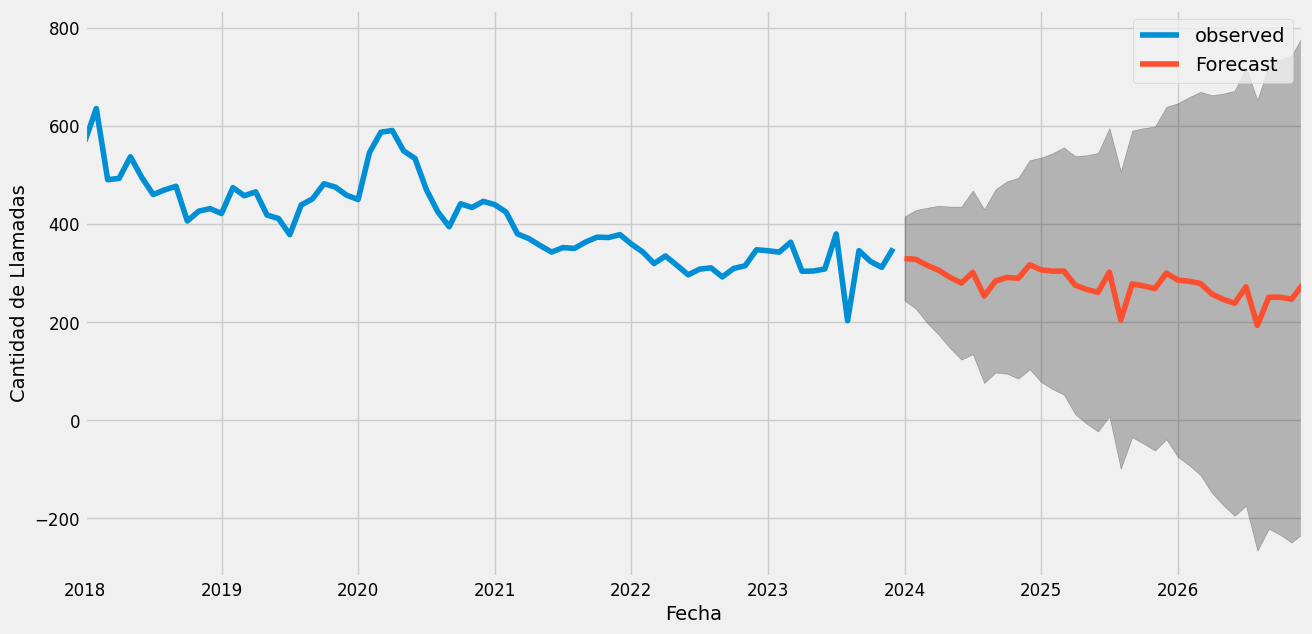

In [21]:
pred_uc = results.get_forecast(steps=36)
pred_ci = pred_uc.conf_int()

ax = grafic.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Fecha')
ax.set_ylabel('Cantidad de Llamadas')

plt.legend()
plt.show()

pred_uc.summary_frame().to_csv("resultadosGeneral.csv")